## **Assignment 06 CNN**

In [24]:
#importing libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [25]:
#importing the data
(trainX, trainy), (testX, testy) = datasets.fashion_mnist.load_data()

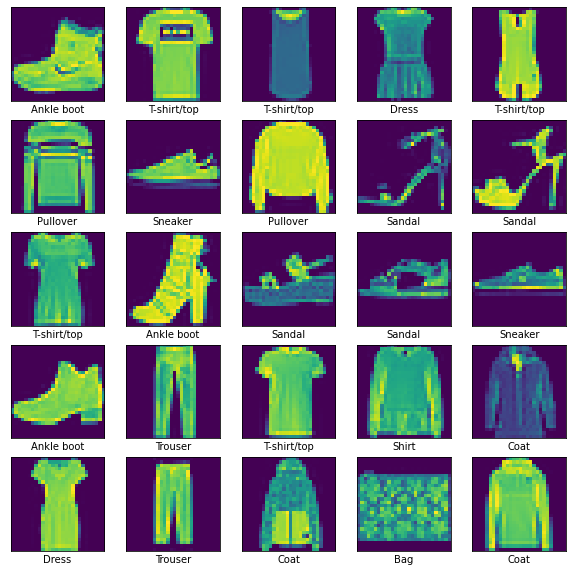

In [26]:
class_names={0: 'T-shirt/top',1: 'Trouser',2: 'Pullover',3: 'Dress',4: 'Coat',5: 'Sandal',6: 'Shirt',7: 'Sneaker',8: 'Bag',9: 'Ankle boot'}

#plotting the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i])
    plt.xlabel(class_names[trainy[i]])
plt.show()


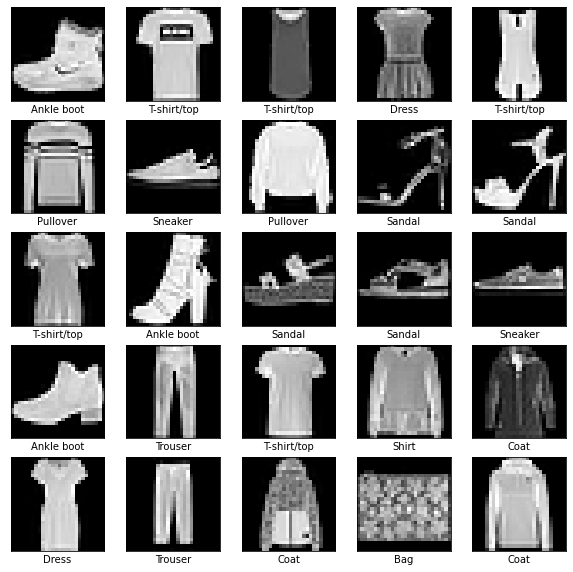

In [27]:
#plotting the first 25 images in grayscale
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i],cmap='gray')
    plt.xlabel(class_names[trainy[i]])
plt.show()

In [28]:
trainX, testX = trainX / 255.0, testX / 255.0

In [29]:
#one hot encoding of labels
from tensorflow.keras.utils import to_categorical
trainy_oh = to_categorical(trainy)
testy_oh = to_categorical(testy)

In [30]:
#importing necessary libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Flatten
import tensorflow as tf

In [38]:
#building the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',  input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))

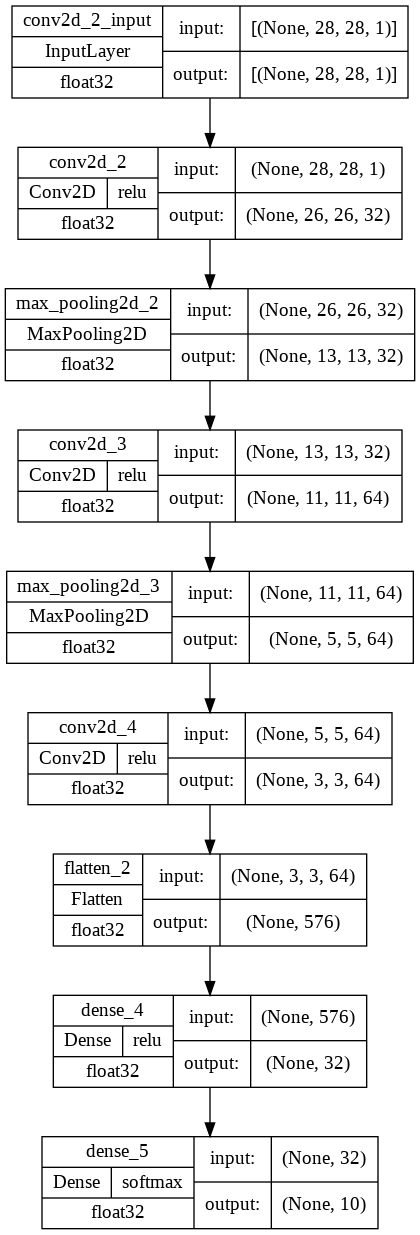

In [39]:
#plotting the layout of model
from tensorflow.keras.utils import plot_model
model_img_file = 'model.png'
plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

In [40]:
#Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
#fitting the model
history = model.fit(trainX, trainy_oh, epochs=10,  validation_data=(testX, testy_oh), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5138 - accuracy: 0.8102 - val_loss: 0.3933 - val_accuracy: 0.8559
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3255 - accuracy: 0.8816 - val_loss: 0.3465 - val_accuracy: 0.8704
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2815 - accuracy: 0.8963 - val_loss: 0.3136 - val_accuracy: 0.8896
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2510 - accuracy: 0.9079 - val_loss: 0.2817 - val_accuracy: 0.8984
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2274 - accuracy: 0.9162 - val_loss: 0.2691 - val_accuracy: 0.9042
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2064 - accuracy: 0.9234 - val_loss: 0.2524 - val_accuracy: 0.9098
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1908 - accuracy: 0.9297 - val_loss: 0.2559 - val_accuracy:

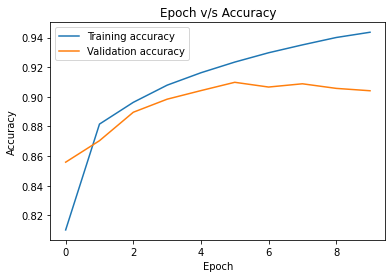

In [42]:
#plot of Epoch v/s accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Epoch v/s Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

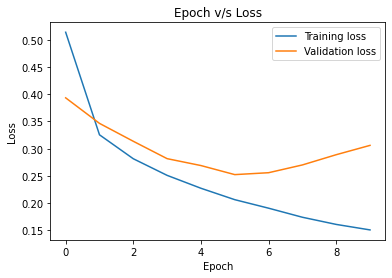

In [43]:
#plot of epoch v/s Loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Epoch v/s Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')